In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [3]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [14]:
print(df.info())
print(df.head())
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
      crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6

In [8]:
df.loc[5:10, 'crim'] = np.nan
df.loc[15:18, 'age'] = np.nan

In [9]:
df['crim'] = df['crim'].fillna(df['crim'].mean())
df['age'] = df['age'].fillna(df['age'].median())

In [11]:
Q1 = df['tax'].quantile(0.25)
Q3 = df['tax'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['tax'] < Q1 - 1.5 * IQR) | (df['tax'] > Q3 + 1.5 * IQR)]
print(f"Number of outliers in 'tax': {outliers.shape[0]}")

Number of outliers in 'tax': 0


In [20]:
df['neighbour'] = np.random.choice(['A', 'B', 'C'], size=len(df))
print(df.head())

      crim    zn  indus  chas    nox  ...  ptratio       b  lstat  medv  neighbour
0  0.00632  18.0   2.31     0  0.538  ...     15.3  396.90   4.98  24.0          C
1  0.02731   0.0   7.07     0  0.469  ...     17.8  396.90   9.14  21.6          A
2  0.02729   0.0   7.07     0  0.469  ...     17.8  392.83   4.03  34.7          A
3  0.03237   0.0   2.18     0  0.458  ...     18.7  394.63   2.94  33.4          B
4  0.06905   0.0   2.18     0  0.458  ...     18.7  396.90   5.33  36.2          B

[5 rows x 15 columns]


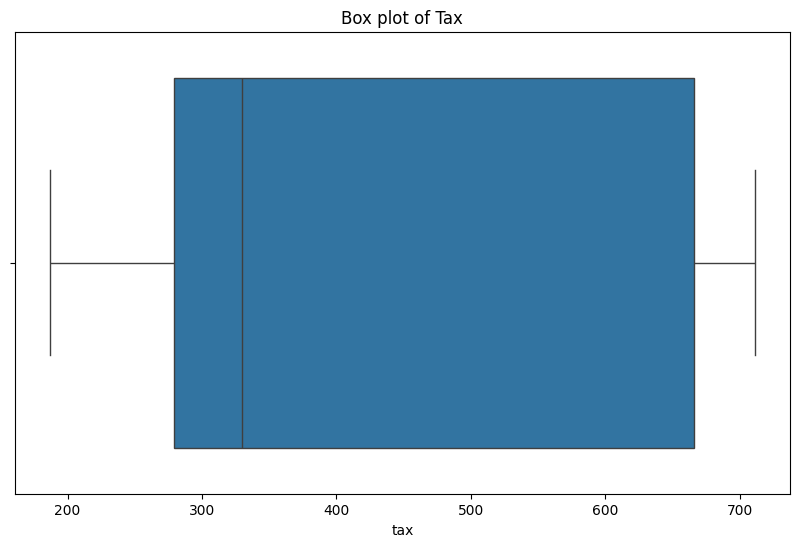

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['tax'])
plt.title('Box plot of Tax')
plt.show()